In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-wildfire-dataset


In [14]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input



In [15]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [16]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'


In [17]:
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [18]:
val_dir ='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'

In [19]:
import os

# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print("Classes:", classes)
print("Number of classes:", num_classes)


Classes: ['nofire', 'fire']
Number of classes: 2


In [ ]:
import matplotlib.pyplot as plt
import os


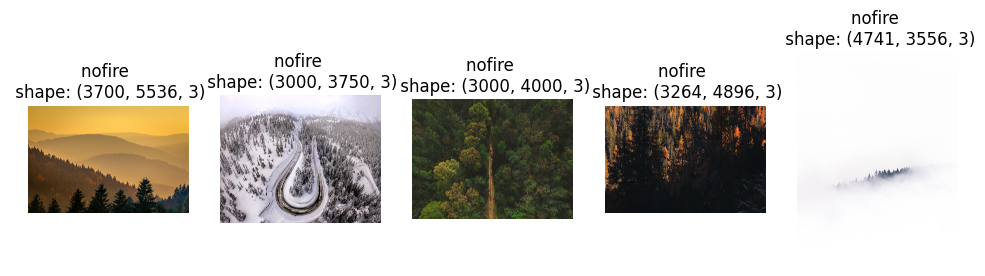

In [ ]:

# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()



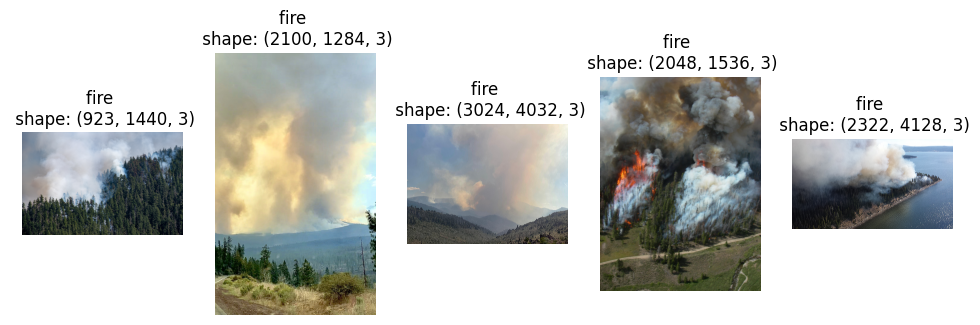

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [21]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)


Class Names: ['fire', 'nofire']


In [22]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

Classes: ['nofire', 'fire']


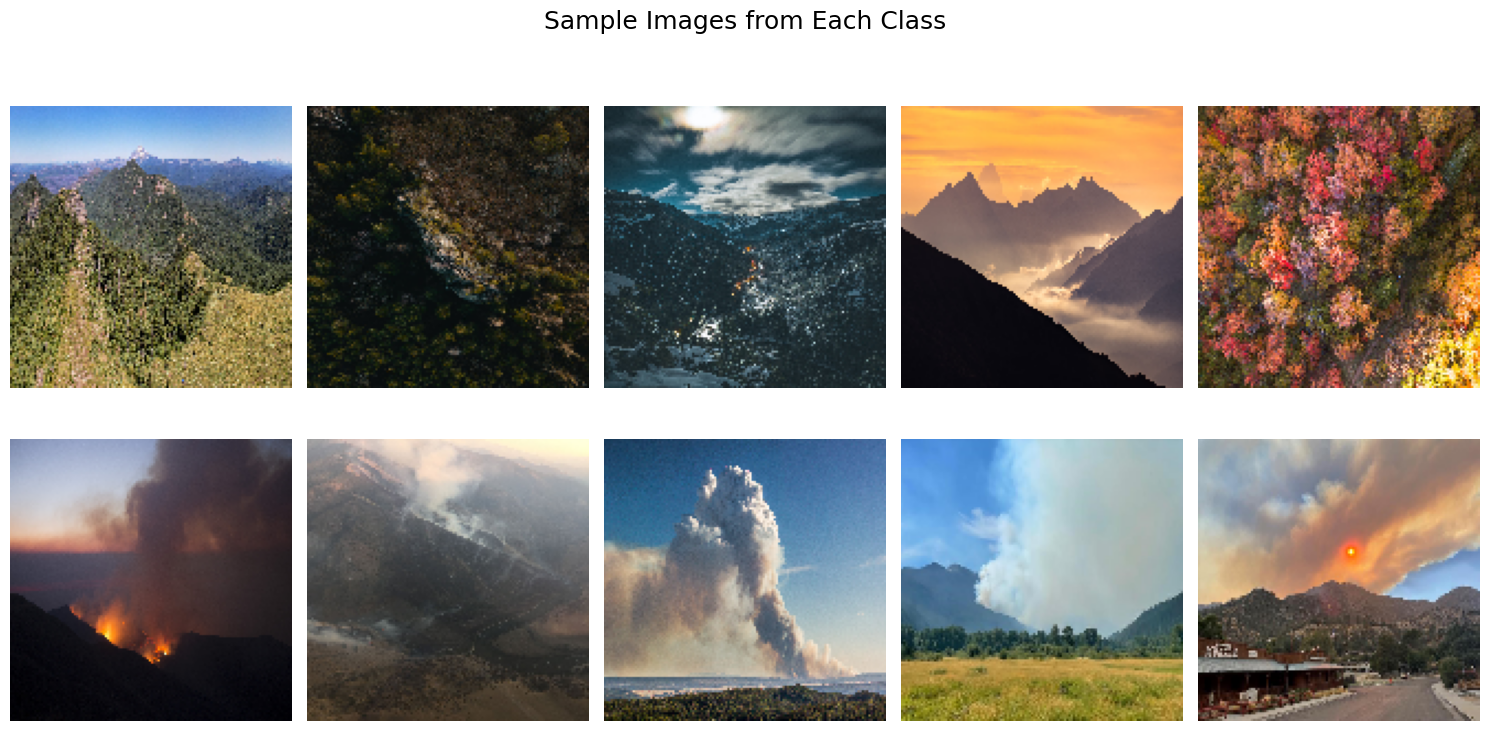

In [24]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import seaborn as sns

# Set paths
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
  # <-- Replace with correct path
categories = os.listdir(train_dir)
print("Classes:", categories)

# Plot some random sample images from each category
def show_sample_images(train_dir, categories, num_images=5):
    plt.figure(figsize=(15, 8))

    for i, category in enumerate(categories):
        category_path = os.path.join(train_dir, category)
        image_files = os.listdir(category_path)
        sample_images = random.sample(image_files, num_images)

        for j, image_file in enumerate(sample_images):
            image_path = os.path.join(category_path, image_file)
            img = load_img(image_path, target_size=(128, 128))
            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(category, fontsize=14)

    plt.suptitle('Sample Images from Each Class', fontsize=18)
    plt.tight_layout()
    plt.show()

show_sample_images(train_dir, categories)


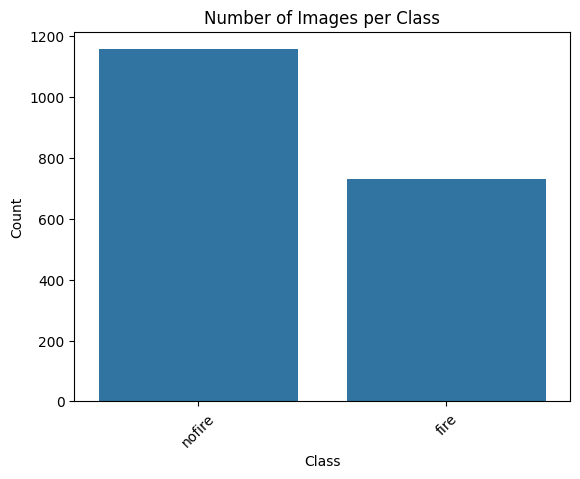

In [26]:
class_counts = {cat: len(os.listdir(os.path.join(train_dir, cat))) for cat in categories}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [27]:
def show_predictions(model, test_dir, class_names):
    test_images = []
    test_labels = []
    test_paths = []

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        image_files = random.sample(os.listdir(class_path), 5)

        for file in image_files:
            path = os.path.join(class_path, file)
            img = load_img(path, target_size=(128, 128))
            img_array = img_to_array(img) / 255.0
            test_images.append(img_array)
            test_labels.append(class_name)
            test_paths.append(path)

    predictions = model.predict(np.array(test_images))
    predicted_labels = [class_names[np.argmax(p)] for p in predictions]

    plt.figure(figsize=(15, 6))
    for i in range(len(test_images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[i])
        plt.title(f"True: {test_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
